# Linear Regression, -----> y=mx+c

# Standard_error --------->  SE = square root of sumation( y_hot - y ) ** 2 / n-2

# Standard deviation ----->  SD = square root of sumation( y - y_mean) ** 2 / n

In [1]:
a = [15, 15, 15, 13]
b = [4, 15, 40, 72]

### SD tell us -> tells us the distrubition of the data from the mean,
****How the accuracy of thier mean --> if my sd is close to "0" it means the we can trust the mean
****it Measures How much observations vary from each other.

## Standard_erorr ---> How precise the sample mean to the true population mean.


In [2]:
'The goal of this file is first how to find a slope and intercept then find the best fit line'

'The goal of this file is first how to find a slope and intercept then find the best fit line'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# create dataFrame
df = pd.DataFrame()
df['X'] = x
df['Y'] = y
df.head(3)


,X,Y
0,1,2
1,2,4
2,3,5


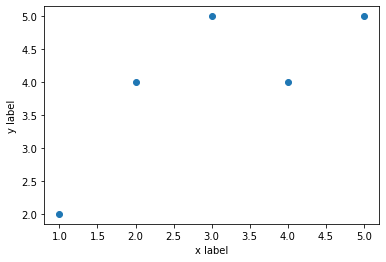

In [5]:
m1 = plt.scatter(x=df['X'], y=df['Y'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

### find the predicted value of y corsspending value of x using  y = mx + c wher m = 0.6  c = 2.2
### Or you can can calculate it the value of m and c  >> look below👇

In [6]:
#y = mx + c
# x = 1 => 2.8
# x = 2 => 3.40
# x = 3 => 4
# x = 4 => 4.6
# x = 5 => 5.2

y = (0.6 * 5) + 2.2 
y


5.2

# Now 
**built the prediction 

In [7]:

def find_Y_predicted(df):
    predi_box = []
    for cell in df['X']:
        y = (0.6 * cell) + 2.2
        predi_box.append(round(y, 2))

    return predi_box


def y_minuseY_y_predicted(predi_box):
    box2 = []
    for i in range(len(predi_box)):
        y = df['Y'].iloc[i] - predi_box[i] 
        box2.append(round(y, 2))
    return box2


def find_y_minuse_yMean_Squared(y):
    yMean = sum(y) / len(y)
    
    box7 = []
    for cell in y:
        box7.append((round(cell - yMean, 2)) ** 2)
    return box7
         
    

def y_minuseY_y_predictedSquared(y_predicted_minuseY):
    return [round((cell ** 2), 2) for cell in y_predicted_minuseY]



# This is cost function 
# cost function (which minimize our error metric)  
# makeing the value +ve by squaring it
# the measure of distance of our model from the data point 
# learning-rate is the steps you take during gradiante distance


In [8]:
y_predicted = find_Y_predicted(df)
box2 = y_minuseY_y_predicted(y_predicted)
box3 = y_minuseY_y_predictedSquared(box2)

df['Y_predicted'] = y_predicted
df['(Y-Y_predicted)'] = box2

print(y_predicted, box2, box3)

[2.8, 3.4, 4.0, 4.6, 5.2] [-0.8, 0.6, 1.0, -0.6, -0.2] [0.64, 0.36, 1.0, 0.36, 0.04]


# Not Sure Check this ----> ??? Euclidian-distance ---- is 
*** 'The square root of the sum of difference b/n a new point X and an existed point Y' ***

In [9]:
df['(Y_predicted - Y )squared'] = box3 # this is the Euclidian distance 
df['y_minuse_y_meanSquared'] = find_y_minuse_yMean_Squared(df['Y'])
df.head(3)

,X,Y,Y_predicted,(Y-Y_predicted),(Y_predicted - Y )squared,y_minuse_y_meanSquared
0,1,2,2.8,-0.8,0.64,4.0
1,2,4,3.4,0.6,0.36,0.0
2,3,5,4.0,1.0,1.00,1.0


# find_standard_error

In [10]:
def find_standard_error():
    #SE = square root of sumation( y_hot - y ) ** 2 / n-2
    se = np.sqrt(sum(df['(Y_predicted - Y )squared']) / (5 - 2))
    return se

print(find_standard_error())

0.8944271909999159


# find_standard_deviation
### =======> tells us how close the values in the dataset are to the mean
### ==> the hiegher the sd the more data spread from the mean and visversa

In [11]:
def find_standard_deviation():
    #SD = square root of sumation( y - y_mean) ** 2 / n
    sd = np.sqrt(sum(df['y_minuse_y_meanSquared']) / 5 )
    return sd

print(find_standard_deviation())


1.0954451150103321


# Add all (Y-Y_predicted-square) to get the sumation  means Euclidian-distance

In [12]:
total = 0
for cell in df['(Y-Y_predicted)']:
    total += cell
print(total)

-5.551115123125783e-17


# Finding Slope and Intercept

In [13]:
n = len(df['X'])

x_times_y = [ (df['X'].iloc[ix] * df['Y'].iloc[ix]) for ix in range(len(df['X'])) ]
x_square = [(cell ** 2) for cell in df['X']]

Slope = ( (n*(sum(x_times_y))) - (sum(df['X']) * sum(df['Y'])) ) / ( (n * sum(x_square)) - (sum(df['X']) ** 2) )
Slope

# m = (687 - 638) / (627 - 576)

intercept = ( ((sum(df['Y']) * sum(x_square))) - (sum(df['X']) * sum(x_times_y)) ) / ( (n * sum(x_square)) - (sum(df['X']) ** 2) )

print(f'slope : >>> {Slope}', f'Intercepte : >>> {intercept}')

slope : >>> 0.6 Intercepte : >>> 2.2


# Or you can create a create a data fram for calculating a slope and intercept
#### Now we can find easly slope and intercept by appling the long formula as the above

In [14]:
df['(X**2)'] = [(cell ** 2) for cell in df['X']]
df['Y**2'] = [(cell ** 2) for cell in df['Y']]
df['X*Y'] = [ (df['X'].iloc[ix] * df['Y'].iloc[ix]) for ix in range(len(df['X'])) ]
df

,X,Y,Y_predicted,(Y-Y_predicted),(Y_predicted - Y )squared,y_minuse_y_meanSquared,(X**2),Y**2,X*Y
0,1,2,2.8,-0.8,0.64,4.0,1,4,2
1,2,4,3.4,0.6,0.36,0.0,4,16,8
2,3,5,4.0,1.0,1.00,1.0,9,25,15
3,4,4,4.6,-0.6,0.36,0.0,16,16,16
4,5,5,5.2,-0.2,0.04,1.0,25,25,25


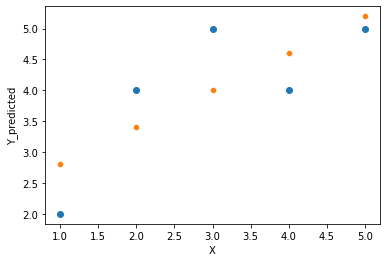

In [15]:
m1 = plt.scatter(x=df['X'], y=df['Y'])
m2 = sns.scatterplot(x=df['X'], y=df['Y_predicted'])

In [16]:
'The square root of the sum of difference b/n a new point Y_predicted and an existed point Y'

'The square root of the sum of difference b/n a new point Y_predicted and an existed point Y'

# More line with minimum b value ===========================
##### you can keep drowing a line with d/t slope and intercept then use the above method then find the least sum the squred value !!!!!

In [17]:
def find_Y_predicted2(df):
    predi_box2 = []
    for cell in df['X']:
        y = (0.6 * cell) + 1.7
        predi_box2.append(round(y, 2))

    return predi_box2


def y_minuse_Y_predicted2(predi_box2):
    box8 = []
    for i in range(len(predi_box2)):
        y = df['Y'].iloc[i] - predi_box2[i]
        box8.append(round(y, 2))
    return box8
          
    
def y_minuse_Y_predicted_square2(Y_minuse_Ypredicted2):
    return [round((cell ** 2), 2) for cell in Y_minuse_Ypredicted2]


y_predicted2 = find_Y_predicted2(df)
box5 = y_minuse_Y_predicted2(y_predicted2)
box6 = y_minuse_Y_predicted_square2(box5)

print(y_predicted2, box5, box6)

#df.drop(columns=['[Y_predicted222]', '[Y-Y_predicted222]', '[Y-Y_predicted222_square222]' ], inplace=True)
df

[2.3, 2.9, 3.5, 4.1, 4.7] [-0.3, 1.1, 1.5, -0.1, 0.3] [0.09, 1.21, 2.25, 0.01, 0.09]


,X,Y,Y_predicted,(Y-Y_predicted),(Y_predicted - Y )squared,y_minuse_y_meanSquared,(X**2),Y**2,X*Y
0,1,2,2.8,-0.8,0.64,4.0,1,4,2
1,2,4,3.4,0.6,0.36,0.0,4,16,8
2,3,5,4.0,1.0,1.00,1.0,9,25,15
3,4,4,4.6,-0.6,0.36,0.0,16,16,16
4,5,5,5.2,-0.2,0.04,1.0,25,25,25


In [18]:
df['[Y_predicted2]'] = y_predicted2
df['[Y-Y_predicted2]'] = box5
df['[Y-Y_predicted2_square2]'] = box6 # this is the Euclidian distance
df.head(3)

,X,Y,Y_predicted,(Y-Y_predicted),(Y_predicted - Y )squared,y_minuse_y_meanSquared,(X**2),Y**2,X*Y,[Y_predicted2],[Y-Y_predicted2],[Y-Y_predicted2_square2]
0,1,2,2.8,-0.8,0.64,4.0,1,4,2,2.3,-0.3,0.09
1,2,4,3.4,0.6,0.36,0.0,4,16,8,2.9,1.1,1.21
2,3,5,4.0,1.0,1.00,1.0,9,25,15,3.5,1.5,2.25


# Add all (Y-Y_predicted-square) to get the sumation  means Euclidian-distance

In [19]:
total2 = 0
for cell in df['[Y-Y_predicted222_square2]']:
    total2 += cell
print(total2)

KeyError: '[Y-Y_predicted222_square2]'

In [ ]:
data1 = plt.scatter(x=df['X'], y=df['Y'])
slope1 = plt.scatter(x=df['X'], y=df['Y_predicted'], color='yellow')
slope2 = sns.scatterplot(x=df['X'], y=df['[Y_predicted2]'], color='red')


In [ ]:
data1 = plt.scatter(x=df['X'], y=df['Y'])

plt.plot(df['X'], df['Y_predicted'], ':b', color='green', label='y=0.6x+2.2')
plt.plot(df['X'], df['[Y_predicted2]'], '--m', color='red', label='y=0.6x+1.7') # best fit line

plt.title('Graph of y=2x+1')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Cost-func will with the help of gradient-descent will help us to find the minimam cost value (means best fit line)

In [ ]:
'The smallest The square root of the sum of difference b/n a new point Y_predicted and an existed point Y IS THE BEST FIT LINE'

In [ ]:
'You can find the best fit line by rotating the line means by giving d/t value to the intercept(b) y=mx+b'

In [ ]:
"""
The standard deviation measures the spread of the data about the mean value. 
It is useful in comparing sets of data which may have the same mean but a different range. 
For example, the mean of the following two is the same: 15, 15, 15, 14, 16 and 2, 7, 14, 22, 30. 
However, the second is clearly more spread out.

"""


In [ ]:
"""
Example

Find the standard deviation of 4, 9, 11, 12, 17, 5, 8, 12, 14
First work out the mean: 10.222
Now, subtract the mean individually from each of the numbers given and square the result. 
This is equivalent to the (x - x bar)² step. x refers to the values given in the question.
Now add up these results (this is the 'sigma' in the formula): 139.55
Divide by n. n is the number of values, so in this case is 9. This gives us: 15.51
And finally, square root this: 3.94

"""